# Project: Investigate a TMDB Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset is a collection of about 10,000 movies from the The Movie Database(TMDb) with a whole lot of information about each movie categorized under a list of 21 columns. The questions I would be posing for this dataset are as follows-

1) Which are the most popular Genres of movies being made ?  
2) Which Production companies make the highest revenue ?  
3) How has the Revenue grown over the past 55 years ?

In [1]:
# Importing all the necessary packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In [2]:
# Load the data into our dataframe
df_tmdb= pd.read_csv('tmdb-movies.csv')
# Using the .head() to make sure all of the data is loaded properly to our dataframe
# Also, looks like the .csv file only had the ',' default delimiter
df_tmdb.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [3]:
#The number of rows and columns in the TMDB dataframe
df_tmdb.shape

(10866, 21)

In [4]:
#Checking on the different column names, their data types and non-null/null values in each column
df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

### Data Cleaning- Removing Null, duplicates and some columns.  

As we can see, we have a lot of null values in many columns of our dataframe.Considering the amount of null values and the requirement of the columns for our data analysis lets handle the null values and drop any unnecessary columns respectively. 

In [5]:
# Getting the number of missing values per column
df_tmdb.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

Let us keep one id column from id and imdb_id.The columns homepage, tagline, cast, keywords and overview either have too many null values or are not necessary for our data analysis we are making on. Hence let's drop them

In [6]:
#Dropping columns
df_tmdb.drop(['imdb_id','cast','homepage','tagline','keywords','overview'],axis=1, inplace=True)

Now we are left with null values in the director, genres and production_companies columns. Let's examine a subset of the dataset containing non-null values for each of the columns and drop the null values from them.

In [7]:
df_tmdb.dropna(subset=['director'])

,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,9.110700,135000000,532950503,The Revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,8.654359,155000000,440603537,Terminator Genisys,Alan Taylor,125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,7.667400,108000000,595380321,The Martian,Ridley Scott,141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,7.404165,74000000,1156730962,Minions,Kyle Balda|Pierre Coffin,91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,6.326804,175000000,853708609,Inside Out,Pete Docter,94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15,3935,8.0,2015,1.609999e+08,7.854116e+08


In [8]:
df_tmdb.dropna(subset=['genres'])

,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,9.110700,135000000,532950503,The Revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,8.654359,155000000,440603537,Terminator Genisys,Alan Taylor,125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,7.667400,108000000,595380321,The Martian,Ridley Scott,141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,7.404165,74000000,1156730962,Minions,Kyle Balda|Pierre Coffin,91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,6.326804,175000000,853708609,Inside Out,Pete Docter,94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15,3935,8.0,2015,1.609999e+08,7.854116e+08


In [9]:
df_tmdb.dropna(subset=['production_companies'])

,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,9.110700,135000000,532950503,The Revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,8.654359,155000000,440603537,Terminator Genisys,Alan Taylor,125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,7.667400,108000000,595380321,The Martian,Ridley Scott,141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,7.404165,74000000,1156730962,Minions,Kyle Balda|Pierre Coffin,91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,6.326804,175000000,853708609,Inside Out,Pete Docter,94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15,3935,8.0,2015,1.609999e+08,7.854116e+08


In [10]:
df_tmdb.dropna(inplace=True)

In [11]:
# Now we have a datset free of null values :)
df_tmdb.isnull().sum()

id                      0
popularity              0
budget                  0
revenue                 0
original_title          0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

Let us find the number of duplicates the dataset has and try to drop them as well.

In [12]:
#Number of duplicate values in every column of the dataset
sum(df_tmdb.duplicated())

1

In [13]:
df_tmdb.drop_duplicates(inplace=True)

In [14]:
df_tmdb.shape

(9806, 15)

Let us store the first set of clean data in a new csv file.

In [15]:
df_tmdb.to_csv('tmdb-movies_clean1.csv', index=False)

### Data Cleaning- More data wrangling

In [16]:
df_tmdb= pd.read_csv('tmdb-movies_clean1.csv')
df_tmdb.head(2)


,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


Let us find out the rows where budget_adj and revenue_adj are zero and let us drop all these rows.

In [17]:
df_temp1= df_tmdb.query('budget_adj==0 and revenue_adj==0')
df_temp1.shape

(3832, 15)

In [18]:
df_tmdb.drop(df_temp1.index, axis=0, inplace=True)

We already have budget_adj and revenue_adj accounting for the inflation since 2010. Hence let us drop the budget and revenue columns. Also, let us keep only release_year for the data analysis and hence drop the release date. 

In [19]:
df_tmdb.drop(['budget','revenue','release_date'], axis=1, inplace=True)

In [20]:
print("Our clean dataset has a shape of : {}".format(df_tmdb.shape))

Our clean dataset has a shape of : (5974, 12)


Let's store our second set of cleaned data in the tmdb-movies_clean2.csv file.

In [21]:
df_tmdb.to_csv('tmdb-movies_clean2.csv', index=False)

In [22]:
df_tmdb= pd.read_csv('tmdb-movies_clean2.csv')

In [23]:
df_tmdb.head(3)

,id,popularity,original_title,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08


We see the values in the genres, production companies and some values in director columns are seperated by '|'. Our goal to remove the '|' symbol, re-arrange all our data so that there is a 1:1 mapping between each director, production company and genre. 

 Here I am creating a new dataframe genres_new by splitting the values of the genres column.  
 Assigning the id of the original dataset to the new genres datatframe.  
 Using melt function we create 1:1 mapping between all the ids and genres.  
 Drop the labels called variable created by the melt function.  
 Drop all null values created during the process if any.   

In [24]:
genres_new= df_tmdb['genres'].str.split('|', expand=True)
genres_new['id']=df_tmdb['id']
genres_new= pd.melt(genres_new,id_vars='id',value_name= 'genres')
genres_new.drop(labels='variable',axis=1, inplace=True)
genres_new.dropna(inplace=True)
genres_new.shape

(15526, 2)

Repeating the same for the director and the production companies columns

In [25]:
director_new= df_tmdb['director'].str.split('|', expand=True)
director_new['id']=df_tmdb['id']
director_new= pd.melt(director_new,id_vars='id',value_name= 'director')
director_new.drop(labels='variable',axis=1, inplace=True)
director_new.dropna(inplace=True)
director_new.shape

(6496, 2)

In [26]:
production_companies_new= df_tmdb['production_companies'].str.split('|', expand=True)
production_companies_new['id']=df_tmdb['id']
production_companies_new= pd.melt(production_companies_new,id_vars='id',value_name= 'production_companies')
production_companies_new.drop(labels='variable',axis=1, inplace=True)
production_companies_new.dropna(inplace=True)
production_companies_new.shape

(15551, 2)

Let us drop the three columns from our actual dataset df_tmdb to add in the new values of columns with their respective names.

In [27]:
drop_columns = ['genres','director','production_companies']
df_tmdb.drop(labels = drop_columns,axis = 1,inplace = True)

Let us merge the genres_new, director_new and production_companies_new dataframes into our main df_tmdb dataframe

In [28]:
df1= pd.merge(df_tmdb,genres_new,on='id')
df2= pd.merge(df1,director_new,on='id')
df3= pd.merge(df2,production_companies_new,on='id')
df_tmdb=df3

In [29]:
df_tmdb.shape

(44041, 12)

Checking for duplicates and deleting them as well.

In [30]:
sum(df_tmdb.duplicated())

3

In [31]:
df_tmdb.drop_duplicates(inplace=True)

This is the shape of our finally cleaned dataframe.

In [32]:
df_tmdb.shape

(44038, 12)

Let's store our last set of cleaned data in the tmdb-movies_clean_final.csv file.

In [33]:
df_tmdb.to_csv('tmdb-movies_clean_final.csv', index=False)

<a id='eda'></a>
## Exploratory Data Analysis

### Which are the most popular Genres of the movies being made ?

In [34]:
df_tmdb.head(3)

,id,popularity,original_title,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres,director,production_companies
0,135397,32.985763,Jurassic World,124,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,Colin Trevorrow,Universal Studios
1,135397,32.985763,Jurassic World,124,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,Colin Trevorrow,Amblin Entertainment
2,135397,32.985763,Jurassic World,124,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,Colin Trevorrow,Legendary Pictures


Grouping genres by median of popularity, sorting the values and plotting the same. 

In [35]:
gp_gen_po= df_tmdb.groupby('genres').median().popularity

In [36]:
gp_gen_po.index

Index(['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music',
       'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War',
       'Western'],
      dtype='object', name='genres')

In [37]:
gp_gen_po.values

array([0.8676   , 0.991867 , 1.057194 , 0.68675  , 0.737257 , 0.226575 ,
       0.6177635, 0.9123305, 1.052831 , 0.170069 , 0.626646 , 0.493944 ,
       0.553869 , 0.743875 , 0.6066795, 0.879116 , 0.313973 , 0.719299 ,
       0.724013 , 0.653746 ])

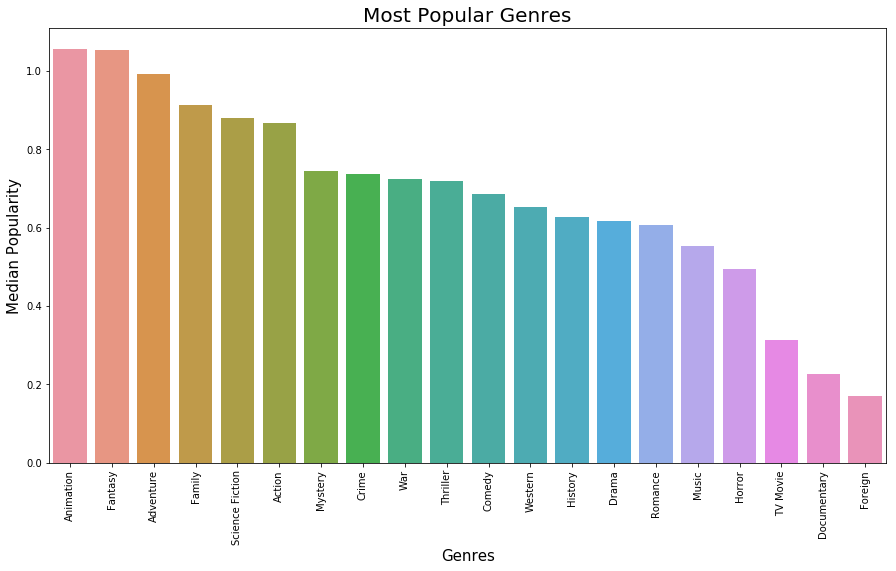

In [38]:
plt.figure(figsize= (15,8))
sns.barplot(x= gp_gen_po.sort_values(ascending=False).index,
            y= gp_gen_po.sort_values(ascending=False).values);
plt.xlabel('Genres', fontsize=15);
plt.ylabel('Median Popularity',fontsize=15);
plt.xticks(rotation='vertical',fontsize=10);
plt.title('Most Popular Genres', fontsize=20);

Animation and Fantasy are the most popular genres followed by Adventure, Family, Science Fiction and Action next in the queue.


### Which are the Production Companies that make the highest revenue ?

Grouping Production Companies by the highest revenue, sorting values and plotting the same.

In [39]:
high_rev_pc = df_tmdb.groupby('production_companies').max()['revenue_adj']

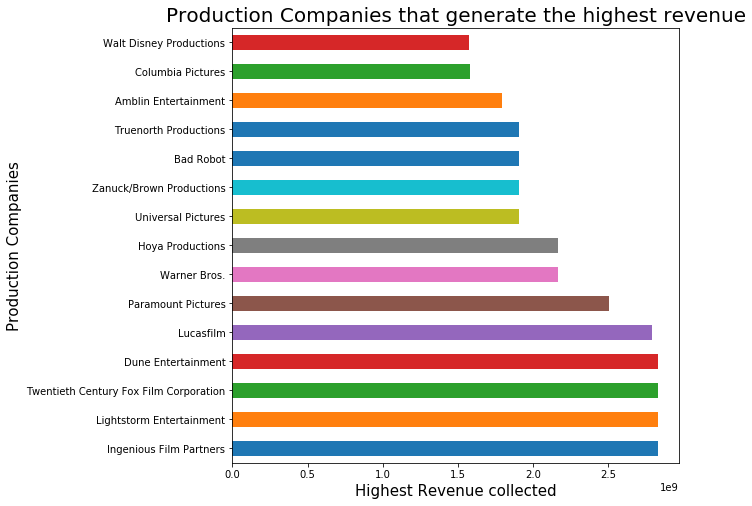

In [42]:
highest_rev_pc=high_rev_pc.sort_values(ascending=False)[0:15]
plt.figure(figsize= (17,8))
highest_rev_pc.plot(kind='barh', figsize=(8,8));
plt.ylabel('Production Companies', fontsize=15);
plt.xlabel('Highest Revenue collected',fontsize=15);
plt.title('Production Companies that generate the highest revenue',fontsize=20);

Ingenious Film Partners, Lightstorm Entertainment, Twentieth Century Fox Film Corporation, Dune Entertainment and Lucasfilm are the Production Companies that make the highest revenue followed by others as seen from the graph.

### How has the Revenue grown over the past 55 years ?

Here we grouping our entire dataset by release_year and revenue_adj columns to show how the revenue generated by movies has grown over the past 55 years. 

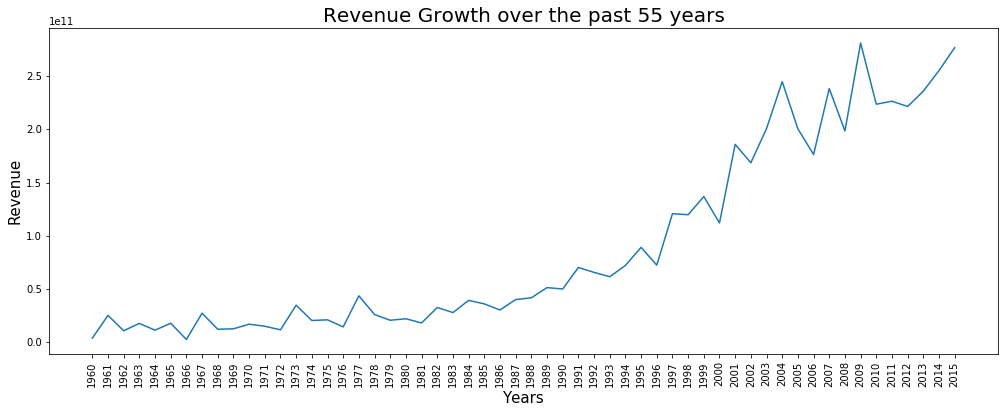

In [43]:
rev_growth = df_tmdb.groupby('release_year')['revenue_adj'].sum()
plt.figure(figsize = (17,6));
plt.plot(rev_growth);
plt.xlabel('Years', fontsize=15);
plt.ylabel('Revenue',fontsize=15);
plt.xticks(np.arange(1960,2016,1),rotation='vertical',fontsize=10);
plt.title('Revenue Growth over the past 55 years', fontsize=20);


Starting from 2001, the revenue shows a continuous growth from a range of 121 billion US dollars to 276 billion US dollars. Though there are a few dips indicating decrease, it is not lower than 125 billion US dollars.

<a id='conclusions'></a>
## Conclusions

1)Animation and Fantasy are the most popular genres followed by Adventure, Family, Science Fiction and Action next in the queue.  
2)Ingenious Film Partners, Lightstorm Entertainment, Twentieth Century Fox Film Corporation, Dune Entertainment and Lucasfilm are the Production Companies that make the highest revenue.  
3)Starting from 2001, the revenue shows a continuous growth from a range of 121 billion US dollars to 276 billion US dollars. Though there are a few dips indicating decrease, it is not lower than 125 billion US dollars.

### Resources include Google, Youtube, Stackoverflow and Python Documentation.

In [1]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'TMDB_Movie_DataAnalysis.ipynb'])

0